# SciKitLearn-RandomActsOfPizza
Python algorithm to predict whether a post will yield a pizza submitted to r/RandomActsOfPizza


Dataset: http://cs.stanford.edu/~althoff/raop-dataset/
Paper: http://cs.stanford.edu/~althoff/raop-dataset/altruistic_requests_icwsm.pdf

This dataset contains a collection of 5671 textual requests for pizza from the Reddit community "Random Acts of Pizza" together with their outcome (successful/unsuccessful) and meta-data.

This dataset is released together with following paper:

How to Ask for a Favor: A Case Study on the Success of Altruistic Requests 
Tim Althoff, Cristian Danescu-Niculescu-Mizil, Dan Jurafsky
Proceedings of ICWSM, 2014.

Please cite this paper and send us a note if you use this resource in your work. (BibTex included at the end of this file.)

Contact: althoff@stanford.edu 
         cristian@mpi-sws.org


---- DATA DESCRIPTION AND FORMAT ----

- This dataset includes 5671 requests collected from the Reddit community "Random Acts of Pizza" (http://www.reddit.com/r/Random_Acts_Of_Pizza/) between December 8, 2010 and September 29, 2013 (retrieved on September 30, 2013). 
All requests ask for the same thing: a free pizza. The outcome of each request --- whether its author received a pizza or not --- is known.
Meta-data includes information such as: time of the request, activity of the requester, community-age of the requester, etc.  

- Each entry in pizza_request_dataset.json corresponds to one request (the first and only request by the requester on RAOP).

- For each request, the following fields are included:

  "giver_username_if_known": Reddit username of giver if known, i.e. the person satisfying the request ("N/A" otherwise).

  "in_test_set": Boolean indicating whether this request was part of our test set.

  "number_of_downvotes_of_request_at_retrieval": Number of downvotes at the time the request was collected. 

  "number_of_upvotes_of_request_at_retrieval": Number of upvotes at the time the request was collected. 

  "post_was_edited": Boolean indicating whether this post was edited (from Reddit).

  "request_id": Identifier of the post on Reddit, e.g. "t3_w5491".

  "request_number_of_comments_at_retrieval": Number of comments for the request at time of retrieval. 

  "request_text": Full text of the request.

  "request_text_edit_aware": Edit aware version of "request_text". We use a set of rules to strip edited comments indicating the success of the request such as "EDIT: Thanks /u/foo, the pizza was delicous". 

  "request_title": Title of the request.

  "requester_account_age_in_days_at_request": Account age of requester in days at time of request.

  "requester_account_age_in_days_at_retrieval": Account age of requester in days at time of retrieval.

  "requester_days_since_first_post_on_raop_at_request": Number of days between requesters first post on RAOP and this request (zero if requester has never posted before on RAOP). 

  "requester_days_since_first_post_on_raop_at_retrieval": Number of days between requesters first post on RAOP and time of retrieval. 

  "requester_number_of_comments_at_request": Total number of comments on Reddit by requester at time of request. 

  "requester_number_of_comments_at_retrieval": Total number of comments on Reddit by requester at time of retrieval.

  "requester_number_of_comments_in_raop_at_request": Total number of comments in RAOP by requester at time of request. 

  "requester_number_of_comments_in_raop_at_retrieval": Total number of comments in RAOP by requester at time of retrieval. 

  "requester_number_of_posts_at_request": Total number of posts on Reddit by requester at time of request. 

  "requester_number_of_posts_at_retrieval": Total number of posts on Reddit by requester at time of retrieval. 

  "requester_number_of_posts_on_raop_at_request": Total number of posts in RAOP by requester at time of request. 

  "requester_number_of_posts_on_raop_at_retrieval": Total number of posts in RAOP by requester at time of retrieval.

  "requester_number_of_subreddits_at_request": The number of subreddits in which the author had already posted in at the time of request.

  "requester_received_pizza": Boolean indicating the success of the request, i.e., whether the requester received pizza. 

  "requester_subreddits_at_request": The list of subreddits in which the author had already posted in at the time of request.

  "requester_upvotes_minus_downvotes_at_request": Difference of total upvotes and total downvotes of requester at time of request. 

  "requester_upvotes_minus_downvotes_at_retrieval": Difference of total upvotes and total downvotes of requester at time of retrieval.  

  "requester_upvotes_plus_downvotes_at_request": Sum of total upvotes and total downvotes of requester at time of request. 

  "requester_upvotes_plus_downvotes_at_retrieval": Sum of total upvotes and total downvotes of requester at time of retrieval. 

  "requester_user_flair": Users on RAOP receive badges (Reddit calls them flairs) which is a small picture next to their username. In our data set the user flair is either None (neither given nor received pizza, N=4282), "shroom" (received pizza, but not given, N=1306), or "PIF" (given after received, N=83).

  "requester_username": Reddit username of requester.

  "unix_timestamp_of_request": Unix timestamp of request (supposedly in timezone of user but in most cases equal to the UTC timestamp which is incorrect since most RAOP users are from the USA). 

  "unix_timestamp_of_request_utc": Unit timestamp of request in UTC.

In [207]:
%matplotlib inline

In [208]:
import pandas as pd
import numpy as np
import glob
import json, re
import time
from dateutil.parser import parse
import requests, zipfile, StringIO 

### Read json into Pandas DataFrame

In [103]:
df_pizza = pd.read_json("pizza_request_dataset/pizza_request_dataset.json")

In [209]:
df_pizza[:3]

,giver_username_if_known,in_test_set,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_id,request_number_of_comments_at_retrieval,request_text,request_text_edit_aware,request_title,...,requester_received_pizza,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_minus_downvotes_at_retrieval,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,requester_user_flair,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc
0,N/A,False,2,6,0,t3_w5491,7,"I'm not in College, or a starving artist or an...","I'm not in College, or a starving artist or an...","[Request] Ontario, Canada - On my 3rd of 5 day...",...,True,"[AdviceAnimals, WTF, funny, gaming, movies, te...",32,212,48,610,shroom,RitalinYourMemory,1341604684,1341601084
1,N/A,False,2,6,1,t3_qysgy,8,Hello! It's been a hard 2 months with money an...,Hello! It's been a hard 2 months with money an...,"[REQUEST] Southern Arizona, Tucson Hungry Family",...,True,"[aww, pics]",5,21,13,57,shroom,blubirdhvn,1331868375,1331864775
2,N/A,False,1,4,1,t3_if0ed,1,I'm sure there are needier people on this subr...,I'm sure there are needier people on this subr...,[Request] Pizza for a broke college student,...,True,"[AskReddit, DoesAnybodyElse, IAmA, Marijuana, ...",1359,2110,2423,3456,shroom,taterpot,1309622289,1309618689


### Split data into test and training sets

In [210]:
df_pizza_test  = df_pizza[df_pizza['in_test_set']==True]
df_pizza_train = df_pizza[df_pizza['in_test_set']==False]
n_in_test_set  = float(len(df_pizza_test))/float(len(df_pizza))*100
n_in_train_set = float(len(df_pizza_train))/float(len(df_pizza))*100
print ("Train Set: %f%%" % (n_in_train_set))
print ("Test Set: %f%%" % (n_in_test_set))

Train Set: 71.239640%
Test Set: 28.760360%


In [211]:
# Average succes rates
received_test  = df_pizza_test[df_pizza_test["requester_received_pizza"]==True]["requester_received_pizza"].count()
received_train = df_pizza_train[df_pizza_train["requester_received_pizza"]==True]["requester_received_pizza"].count()
print ("Success rates (Test): %0.2f%%" % (float(received_test)/float(len(df_pizza_test))*100))
print ("Success rates (Development): %0.2f%%" % (float(received_train)/float(len(df_pizza_train))*100))

Success rates (Test): 24.71%
Success rates (Development): 24.60%


In [304]:
grouped_by = df_pizza_train.groupby("requester_received_pizza")[["number_of_upvotes_of_request_at_retrieval"]]
grouped_by.describe()

number_of_upvotes_of_request_at_retrieval
requester_received_pizza                                                 
False                    count                                3046.000000
                         mean                                    5.553513
                         std                                     9.784824
                         min                                     0.000000
                         25%                                     2.000000
                         50%                                     4.000000
                         75%                                     6.000000
                         max                                   345.000000
True                     count                                 994.000000
                         mean                                    8.101610
                         std                                    13.085617
                         min                                     0.000000
                         25%                                     3.000000
                         50%                                     5.000000
                         75%                                     9.000000
                         max                                   276.000000

In [305]:
df_pizza_train[df_pizza_train["requester_received_pizza"]==True]["unix_timestamp_of_request_utc"][:3]

0    1341601084
1    1331864775
2    1309618689
Name: unix_timestamp_of_request_utc, dtype: int64

In [307]:
import datetime
df_pizza_train["unix_timestamp_of_request_utc"].apply(datetime.datetime.fromtimestamp)[:3]

0   2012-07-06 13:58:04
1   2012-03-15 21:26:15
2   2011-07-02 09:58:09
Name: unix_timestamp_of_request_utc, dtype: datetime64[ns]

In [308]:
df_pizza_train["unix_timestamp_of_request_readable"] = df_pizza_train["unix_timestamp_of_request_utc"].apply(datetime.datetime.fromtimestamp)

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [309]:
df_pizza_train["unix_timestamp_of_request_readable"][:3]

0   2012-07-06 13:58:04
1   2012-03-15 21:26:15
2   2011-07-02 09:58:09
Name: unix_timestamp_of_request_readable, dtype: datetime64[ns]

In [310]:
#df_answer_posts["PostHour"] = pd.Series(pd.DatetimeIndex(df_answer_posts.PostDate).hour)
df_pizza_train["RequestHour"] = pd.Series(pd.DatetimeIndex(df_pizza_train["unix_timestamp_of_request_readable"]).hour)

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


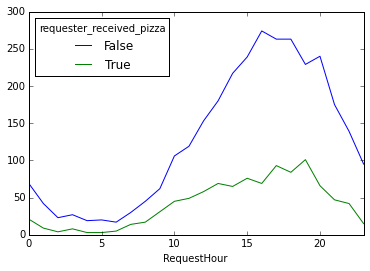

In [311]:
grouped_by_hour = df_pizza_train["unix_timestamp_of_request_readable"].groupby([df_pizza_train["RequestHour"], df_pizza_train["requester_received_pizza"]])
result = grouped_by_hour.apply(lambda x: x.count()).unstack("requester_received_pizza")
result.plot()
#result = grouped_by_hour.describe()
#result.unstack("requester_received_pizza")
#grouped_by_hour.count().plot()
#responsetime_plot = (grouped_by_hour.max()-grouped_by_hour.min()).plot().set_ylabel("Response Hour")

In [325]:
import nltk
train_nouns = []
for text in df_pizza_train["request_text"]:
    tok_text = nltk.word_tokenize(text)
    pos_text = nltk.pos_tag(tok_text)
    text_array = []
    for word, pos in pos_text:
        if pos=='NN':
            text_array.append(word)
    noun = " ".join(text_array)
    train_nouns.append(noun)
train_nouns

[u'starving artist anything bit unlucky year guy job rent month account banking fee bag afternoon fine point food something bus advance',
 u'money craigslist food money family bread anyone family time reading plea Edit family pizza',
 u'subreddit rest share rent yesterday friday housemate lent dinner advance make awesome place EDIT liter coke',
 u'student girlfriend part time job pharmacy left anything rice pizza',
 u'money meal card while stuff yesterday term week pizza burden anything way telling record music stuff folk jazz',
 '',
 u'amazing subreddit existence awhile time side house payday pizza picture artist thought favor sometime room Edit empty fridge bank account',
 u'couple week dollar week something pizza rest week love pizza show side reddit time life hand',
 '',
 u'day housing mom borrow money food week pizza money subreddit Edit',
 u'anyone starving girl south florida time hunger anyone try stay time advance',
 u'poem dance play instrument pizza ( way skype end deal',
 u'

In [326]:
test_nouns = []
for text in df_pizza_test["request_text"]:
    tok_text = nltk.word_tokenize(text)
    pos_text = nltk.pos_tag(tok_text)
    text_array = []
    for word, pos in pos_text:
        if pos=='NN':
            text_array.append(word)
    noun = " ".join(text_array)
    test_nouns.append(noun)
test_nouns

[u'exchange sending damnedest likeness body sharpie cash loss part something art student drawing everything power very animal idea face stranger contort part fun',
 u'super recession waitress restaurant na day week position food random pizza something stale box wheat boyfriend home EDIT week',
 u'spending half universe sense today phone week success story http right ol pizza time',
 u'ndb job lot job cash use pizza love tummy payday help Edit pie paulinator',
 u'pizza sub-reddit anyone',
 u'student house meal cheer me energy everything bar soup feet favour redditor',
 u'bit hobby example work http',
 u'account reason account while paycheck money food house help food pizza anyone hogfathom pizza thank u',
 u'day work week truck money rent bind uplift (',
 u'name till food',
 u'soon yr pizza ) tomorrow pizza cell phone family pizza afterward egiftcard',
 u'time amazing generosity forum EDIT main account account ) mother school time girlfriend roof bit shopping month money moment school c

In [330]:
#Topic extraction with non-nagtive matrix factorization
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck <L.J.Buitinck@uva.nl>
# License: BSD 3 clause

from __future__ import print_function
from time import time

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_20newsgroups


n_samples = 2000
n_features = 1000
n_topics = 50
n_top_words = 100

t0 = time()
print("Loading dataset and extracting TF-IDF features...")

# Extract only nouns from text
dataset = train_nouns

vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=n_features,
                             stop_words='english', strip_accents='unicode')
tfidf = vectorizer.fit_transform(dataset)
print("done in %0.3fs." % (time() - t0))

# Fit the NMF model
print("Fitting the NMF model with n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
nmf = NMF(init='nndsvd', n_components=n_topics, random_state=1).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

feature_names = vectorizer.get_feature_names()

topics = []
for topic_idx, topic in enumerate(nmf.components_):
    topics.append(" ".join([feature_names[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print("Topic #%d:" % topic_idx)
    print(topics[-1])
    print()

Loading dataset and extracting TF-IDF features...
done in 0.162s.
Fitting the NMF model with n_samples=2000 and n_features=1000...
done in 8.943s.
Topic #0:
pizza hut right order girl return pepperoni send cheese chain craving post exchange slice game delivery redditor surprise boyfriend picture site movie treat internet reason warm door sauce lol rice chicken stuff love man store yummy tv pm matter domino choice quality bacon mind party sent use thing forward dog crust group size art fun hot bday place room papa moment plain consideration contest inside sure person disease charity meat eating ask beer coupon spending buy butter draw anybody watch evening link happy taste photo online internship luxury gooey form luck period comment feel science reward yeah safe stranger dream

Topic #1:
food house pantry fridge right comfort need date dog state reading water situation store town hot bag order yesterday till dont type baby apartment process proof restaurant cereal health hand decent op

In [328]:
from sklearn.feature_extraction.text import TfidfTransformer 
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(tfidf)

print (tfidf.shape)
print (X_train_tfidf.shape)

(4040, 1000)
(4040, 1000)


In [329]:
y_train_target = df_pizza_train.requester_received_pizza
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train_target)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [332]:
X_test = vectorizer.fit_transform(test_nouns)
X_test_tfidf = tfidf_transformer.transform(X_test)

In [334]:
predicted = clf.predict(X_test_tfidf) 

In [338]:
print (predicted)
y_test_target = df_pizza_test.requester_received_pizza
np.mean(predicted == y_test_target)  

[False False False ..., False False False]


0.72103004291845496

In [339]:
from sklearn import metrics 


In [206]:
#print (pd.Series(vectorizer.vocabulary_))
#vectorizer.vocabulary_.get(u'ability')
vectorizer

ability         0
access          1
accident        2
account         3
act             4
action          5
activity        6
addition        7
address         8
adult           9
advance        10
advice         11
afford         12
afternoon      13
age            14
aid            15
air            16
airport        17
album          18
alcohol        19
alot           20
amazing        21
amp            22
angel          23
ankle          24
anxiety        25
anybody        26
anymore        27
apart          28
apartment      29
             ... 
went          970
west          971
whatsoever    972
wife          973
wine          974
winter        975
wise          976
wish          977
woman         978
wont          979
word          980
work          981
worker        982
working       983
world         984
worse         985
worth         986
wow           987
writer        988
writing       989
ya            990
yard          991
yay           992
yeah          993
year      

0

In [53]:
df_pizza_development["request_text"][:3]

0    I'm not in College, or a starving artist or an...
1    Hello! It's been a hard 2 months with money an...
2    I'm sure there are needier people on this subr...
Name: request_text, dtype: object

In [54]:
received_a_pizza = []
for text in df_pizza_development["request_text"]:
    counter = 0
    for key in topics[3].split():
        if key in text:
            counter = 1
    received_a_pizza.append(counter)

In [56]:
pd.Series(received_a_pizza).sum()

3542

In [57]:
len(df_pizza_development)

4040

In [168]:
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=n_features,
                             stop_words='english')
vectors = vectorizer.fit_transform(request_text)
vectors.shapedd

(4040, 1000)

In [32]:
vectors.nnz / float(vectors.shape[0]) 

NameError: name 'vectors' is not defined

In [200]:
df_pizza_test["request_text"]

4040      'Sright. In exchange for sending me pizza, I w...
4041      She lives in Round Lake Beach, Illinois, which...
4042      After spending two and a half months unemploye...
4043      I was laid off a few weeks ago, but ndb as I f...
4044      I received a pizza from this sub-reddit about ...
4045      Last few days alone in my student house before...
4046      I like to make 8 bit drawings as a hobby, and ...
4047      Sorry for the new account, but I never had a r...
4048      Having a long day at work, and this week has b...
4049      I've got $0.90 to my name. And her next few pa...
4050      I'm in the US. Money is super tight and my soo...
4051      Hello /RAOP! I've been a Redditor for quite so...
4052                              I prefer saucy to cheesy.
4053      Ok so my name is Alex or Axeltoss, I am a star...
4054      Times are really tough, I am a high-school che...
4055      We are a cool group of three folks that are su...
4056      I just graduated and realized 

In [235]:
request_text_test = df_pizza_test["request_text"]
vectorizer2 = TfidfVectorizer(max_df=0.95, min_df=2, max_features=n_features,
                             stop_words='english')
tfidf2 = vectorizer2.fit_transform(request_text_test.dropna())
#vectorizer.fit_transform(request_text)
#nmf.transform(df_pizza_test["request_text"])

In [222]:
nmf.transform(tfidf2)

array([[  3.34584348e-04,   4.57632941e-03,   1.19707499e-03, ...,
          2.93036191e-03,   4.10328781e-03,  -0.00000000e+00],
       [  4.39320440e-04,  -0.00000000e+00,   1.52677617e-04, ...,
          8.94317497e-04,   4.74285915e-04,   1.18403906e-03],
       [ -0.00000000e+00,   2.73457560e-03,  -0.00000000e+00, ...,
          4.24939311e-03,   8.28407384e-05,   1.04076453e-03],
       ..., 
       [  1.75574880e-03,   1.55180848e-03,  -0.00000000e+00, ...,
          6.41119740e-05,  -0.00000000e+00,  -0.00000000e+00],
       [ -0.00000000e+00,   1.30006339e-03,  -0.00000000e+00, ...,
         -0.00000000e+00,   1.28002348e-03,   2.54382010e-03],
       [  1.30000781e-03,   5.17807976e-02,   2.35312480e-03, ...,
          1.89182185e-03,   2.93541010e-03,  -0.00000000e+00]])

In [223]:
vectorizer2.get_feature_names()

[u'00',
 u'10',
 u'100',
 u'11',
 u'12',
 u'15',
 u'16',
 u'18',
 u'1st',
 u'20',
 u'200',
 u'21',
 u'22',
 u'24',
 u'25',
 u'30',
 u'40',
 u'4th',
 u'50',
 u'500',
 u'able',
 u'absolutely',
 u'accident',
 u'account',
 u'act',
 u'acts',
 u'actually',
 u'add',
 u'address',
 u'advance',
 u'afford',
 u'afternoon',
 u'ago',
 u'ahead',
 u'aid',
 u'alas',
 u'amazing',
 u'amp',
 u'anniversary',
 u'anybody',
 u'anymore',
 u'anyways',
 u'apartment',
 u'apparently',
 u'applied',
 u'applying',
 u'appreciate',
 u'appreciated',
 u'appreciative',
 u'area',
 u'aren',
 u'art',
 u'article',
 u'aside',
 u'ask',
 u'asked',
 u'asking',
 u'ass',
 u'assistance',
 u'ate',
 u'attack',
 u'austin',
 u'available',
 u'away',
 u'awesome',
 u'awful',
 u'awhile',
 u'baby',
 u'bacon',
 u'bad',
 u'bag',
 u'balance',
 u'bank',
 u'bar',
 u'bare',
 u'barely',
 u'basic',
 u'basically',
 u'beans',
 u'bed',
 u'beer',
 u'begging',
 u'begin',
 u'believe',
 u'belly',
 u'best',
 u'better',
 u'big',
 u'bills',
 u'birthday',
 u'b

In [9]:
import nltk

In [231]:
tokenization_pattern = r'''(?x)    # set flag to allow verbose regexps
([A-Z]\.)+        # abbreviations, e.g. U.S.A.
| \w+(-\w+)*        # words with optional internal hyphens
| \$?\d+(\.\d+)?%?  # currency and percentages, e.g. $12.40, 82%
| \w+[\x90-\xff]  # these are escaped emojis
| [][.,;"'?():-_`]  # these are separate tokens
'''
word_tokenizer = nltk.tokenize.regexp.RegexpTokenizer(tokenization_pattern)

In [13]:
sent_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle') 
sentence = "At eight o'clock on Thursday morning... Arthur didn't feel very good."
tokens = nltk.word_tokenize(sentence)
tokens

['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 '...',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good',
 '.']

In [20]:
text = nltk.word_tokenize("And now for something completely different. Hi there")
nltk.pos_tag(text) 

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ'),
 ('.', '.'),
 ('Hi', 'NNP'),
 ('there', 'RB')]

In [252]:
import nltk.data 

In [36]:
import sys
sys.path

['',
 '/Users/manny/Root534/lib',
 '/Users/manny/Code/InsightDataScience',
 '/anaconda/lib/python2.7/site-packages/Sphinx-1.3.1-py2.7.egg',
 '/anaconda/lib/python2.7/site-packages/setuptools-17.1.1-py2.7.egg',
 '//anaconda/lib/python2.7/site-packages',
 '//anaconda/lib/python27.zip',
 '//anaconda/lib/python2.7',
 '//anaconda/lib/python2.7/plat-darwin',
 '//anaconda/lib/python2.7/plat-mac',
 '//anaconda/lib/python2.7/plat-mac/lib-scriptpackages',
 '//anaconda/lib/python2.7/lib-tk',
 '//anaconda/lib/python2.7/lib-old',
 '//anaconda/lib/python2.7/lib-dynload',
 '//anaconda/lib/python2.7/site-packages/aeosa',
 '//anaconda/lib/python2.7/site-packages/IPython/extensions']

In [15]:
import nltk.data
text = '''
    Punkt knows that the periods in Mr. Smith and Johann S. Bach
    do not mark sentence boundaries.  And sometimes sentences
    can start with non-capitalized words.  i is a good variable
    name.
... '''
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
print('\n-----\n'.join(sent_detector.tokenize(text.strip())))

Punkt knows that the periods in Mr. Smith and Johann S. Bach
    do not mark sentence boundaries.
-----
And sometimes sentences
    can start with non-capitalized words.
-----
i is a good variable
    name.
-----
...


[u'starving artist anything bit unlucky year guy job rent month account banking fee bag afternoon fine point food something bus advance',
 u'money craigslist food money family bread anyone family time reading plea Edit family pizza',
 u'subreddit rest share rent yesterday friday housemate lent dinner advance make awesome place EDIT liter coke',
 u'student girlfriend part time job pharmacy left anything rice pizza',
 u'money meal card while stuff yesterday term week pizza burden anything way telling record music stuff folk jazz',
 '',
 u'amazing subreddit existence awhile time side house payday pizza picture artist thought favor sometime room Edit empty fridge bank account',
 u'couple week dollar week something pizza rest week love pizza show side reddit time life hand',
 '',
 u'day housing mom borrow money food week pizza money subreddit Edit',
 u'anyone starving girl south florida time hunger anyone try stay time advance',
 u'poem dance play instrument pizza ( way skype end deal',
 u'

In [27]:
testme = [u'money', u'meal', u'card', u'while', u'stuff', u'yesterday', u'term', u'week', u'pizza', u'burden', u'anything', u'way', u'telling', u'record', u'music', u'stuff', u'folk', u'jazz']

In [32]:
" ".join([])

''

In [46]:
testme1=['a', 'b']
testme1[-1]

'b'